In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### Load the data file using pandas. 

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


#### Check for null values in the data. Get the number of null values for each column.

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Drop records with nulls in any of the columns. 

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


###### Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

##### Extract the numeric value from the column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


###### Multiply the value by 1,000, if size is mentioned in Mb

In [9]:
df.drop(df[df['Size'] == 'Varies with device'].index,inplace=True)

In [10]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k','') if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('M','')) *1000 if 'M' in str(x) else x)
df['Size'] = pd.to_numeric(df['Size'])

In [11]:
df['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: Size, Length: 7723, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), object(11)
memory usage: 844.7+ KB


###### Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [13]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10833        44
10834         7
10836        38
10837         4
10840    398307
Name: Reviews, Length: 7723, dtype: object

In [14]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [15]:
df['Reviews'].dtype

dtype('int64')

##### Installs field is currently stored as string and has values like 1,000,000+. 

In [16]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7723, dtype: object

###### Treat 1,000,000+ as 1,000,000

In [17]:
df['Installs'] = df['Installs'].str.replace('+', '',regex = True).str.replace(',', '',regex=True)
df['Installs'] = pd.to_numeric(df['Installs'])
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64

###### Remove ‘+’, ‘,’ from the field, convert it to integer

In [18]:
df['Installs'].dtype

dtype('int64')

###### Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [19]:
df['Price'] = df['Price'].str.replace('$', '',regex=True)
df['Price'] = pd.to_numeric(df['Price'])
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7723, dtype: float64

In [20]:
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

###### Sanity checks:

##### Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [21]:
df['Rating'].describe()

count    7723.000000
mean        4.173935
std         0.544638
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [22]:
df[(df['Rating'] < 1.0) | (df['Rating'] > 5.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


###### Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 844.7+ KB


In [24]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [25]:
df.drop(df[df['Reviews']>df['Installs']].index,inplace=True)

In [26]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


##### For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
df[(df['Type'] == 'Free' ) & (df['Price'] > 0.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7717 non-null   object 
 1   Category        7717 non-null   object 
 2   Rating          7717 non-null   float64
 3   Reviews         7717 non-null   int64  
 4   Size            7717 non-null   float64
 5   Installs        7717 non-null   int64  
 6   Type            7717 non-null   object 
 7   Price           7717 non-null   float64
 8   Content Rating  7717 non-null   object 
 9   Genres          7717 non-null   object 
 10  Last Updated    7717 non-null   object 
 11  Current Ver     7717 non-null   object 
 12  Android Ver     7717 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 844.0+ KB


#### Performing univariate analysis: 

##### Boxplot for Price

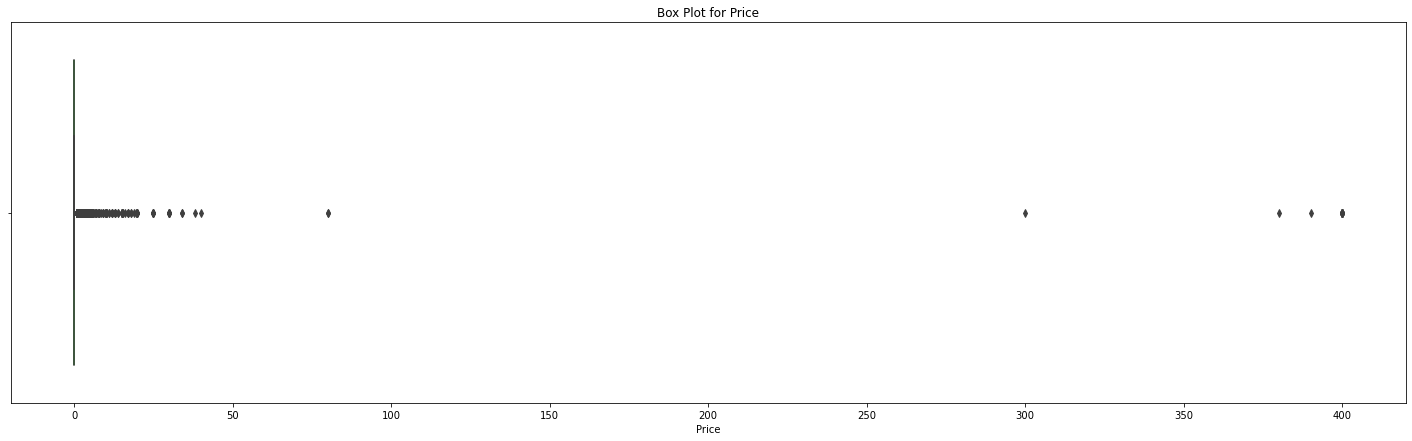

In [30]:
plt.figure(figsize = (25,7))
plt.title('Box Plot for Price')
sns.boxplot(x = df.Price, boxprops={'color' : 'green', })
plt.xlabel('Price');

###### Are there any outliers? Think about the price of usual apps on Play Store.

Any apps above the price of 50 and above can be considered outliers, and looking at the box plot above there are quite a few outliers.

###### Boxplot for Reviews

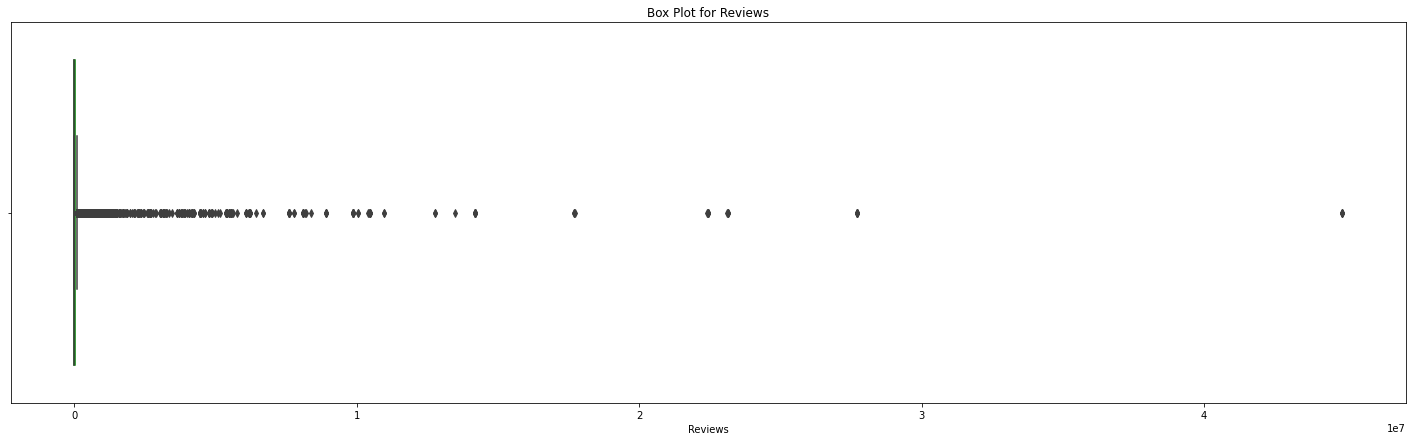

In [31]:
plt.figure(figsize = (25,7))
plt.title('Box Plot for Reviews')
sns.boxplot(x = df.Reviews, boxprops={'color' : 'green', })
plt.xlabel('Reviews');

###### Are there any apps with very high number of reviews? Do the values seem right?

In [32]:
df[df['Reviews']>1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,Voice changer with effects,FAMILY,4.2,1260903,8700.0,50000000,Free,0.0,Everyone,Entertainment,"August 2, 2018",3.4.8,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10327,Garena Free Fire,GAME,4.5,5534114,53000.0,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up


##### Histogram for Rating

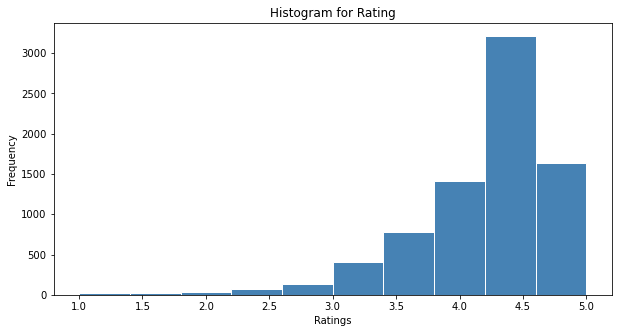

In [33]:
plt.figure(figsize=(10,5))
plt.title('Histogram for Rating')
plt.hist(df.Rating, bins = 10, edgecolor = 'white', color = 'steelblue')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

###### How are the ratings distributed? Is it more toward higher ratings?

The frequency of the ratings are gradually increasing from 2 and above with the highest frequency at aroung 4.5 and then going down from 4.5 to 5.

###### Histogram for Size

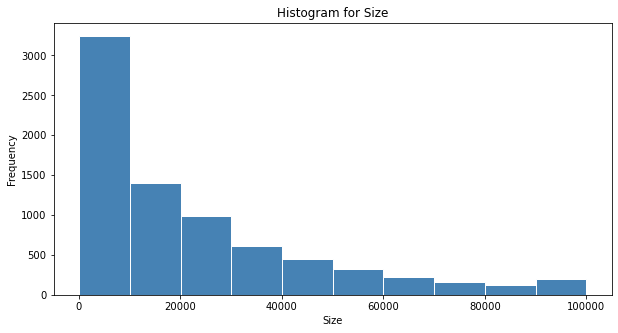

In [34]:
plt.figure(figsize=(10,5))
plt.title('Histogram for Size')
plt.hist(df.Size, bins =10, edgecolor = 'white', color = 'steelblue')
plt.xlabel('Size')
plt.ylabel('Frequency');

The frequency for the low size apps are comparitively higher

There are outliers for price and review columns with price for few being above 50 dollars and the reviews being more than a million.

##### Outlier treatment: 

##### From the box plot, it seems like there are some apps with very high price. A price of 200dollars for an application on the Play Store is very high and suspicious!

In [35]:
df[df['Price']> 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


##### Is 200 indeed a high price?

Most of the apps which are high priced are the life style apps with very few being for entertainment and finance. The price above 200 is high for the apps though the apps are premium,VIP or pro.

##### Drop these as most seem to be junk apps

In [36]:
df.drop(df[df['Price']> 200].index,inplace=True)

In [37]:
df[df['Price']> 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


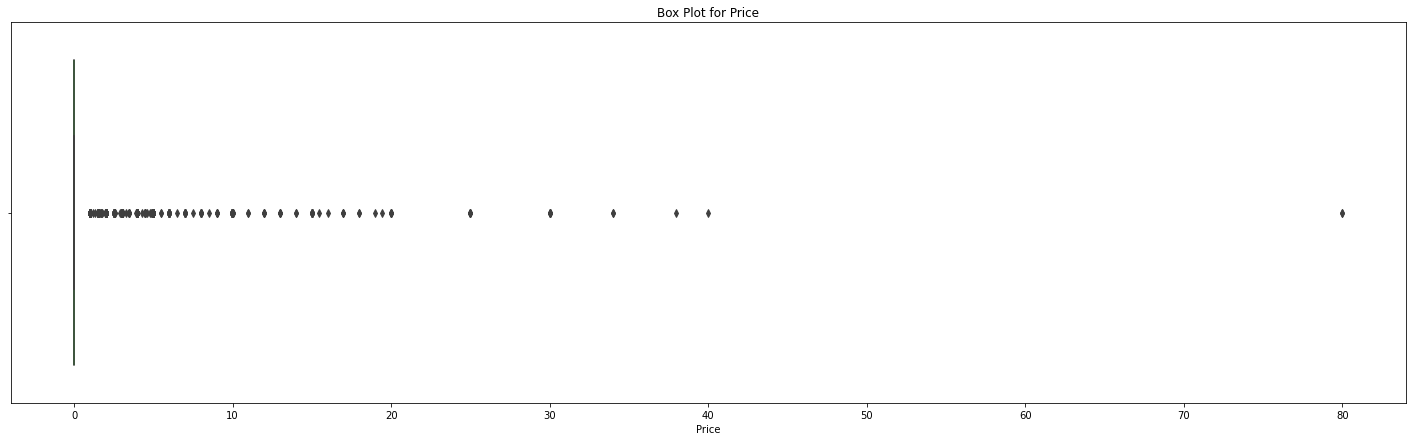

In [38]:
plt.figure(figsize = (25,7))
plt.title('Box Plot for Price')
sns.boxplot(x = df.Price, boxprops={'color' : 'green', })
plt.xlabel('Price');

In [39]:
df['Price'].unique()

array([ 0.  ,  4.99,  6.99,  7.99,  3.99,  5.99,  2.99,  1.99,  9.99,
        0.99,  9.  ,  5.49, 10.  , 24.99, 11.99, 79.99, 16.99, 14.99,
       29.99, 12.99,  3.49, 10.99,  7.49,  1.5 , 19.99, 15.99, 33.99,
       39.99,  2.49,  4.49,  1.7 ,  1.49,  3.88, 17.99,  3.02,  1.76,
        4.84,  4.77,  1.61,  1.59,  6.49,  1.29, 37.99, 18.99,  8.49,
        1.75, 14.  ,  2.  ,  3.08,  2.59, 19.4 , 15.46,  8.99,  3.04,
       13.99,  4.29,  3.28,  4.6 ,  1.  ,  2.9 ,  1.97,  2.56,  1.2 ])

##### Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [40]:
df[df['Reviews'] > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [41]:
df.drop(df[df['Reviews'] > 2000000].index,inplace = True)

In [42]:
df[df['Reviews'] > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


##### There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

##### Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [43]:
df['Installs'].quantile(q=[0.1, 0.25,0.5,0.70,0.9,0.95,0.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

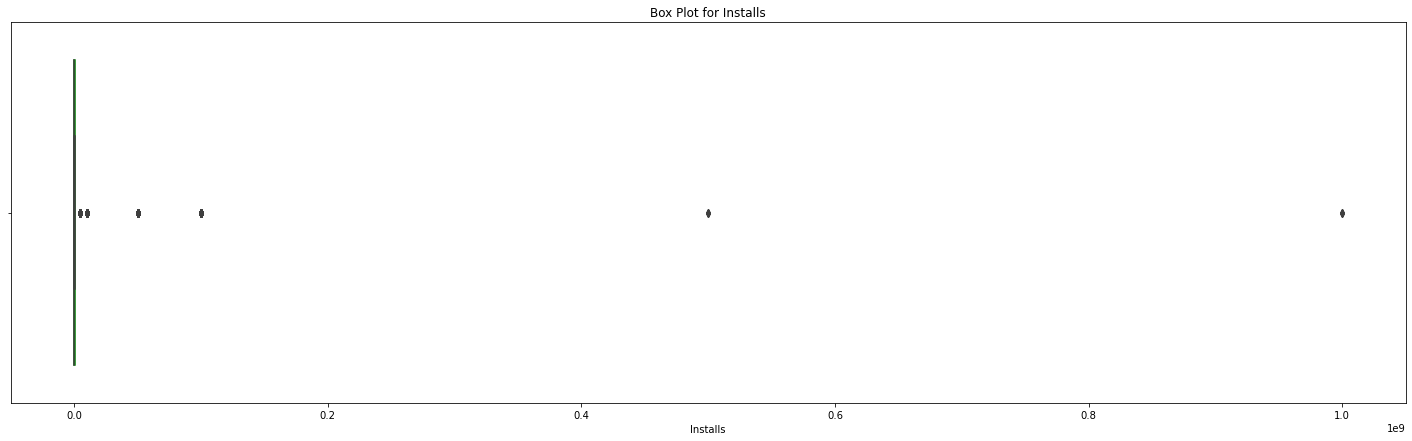

In [44]:
plt.figure(figsize = (25,7))
plt.title('Box Plot for Installs')
sns.boxplot(x = df.Installs, boxprops={'color' : 'green', })
plt.xlabel('Installs');

###### Decide a threshold as cutoff for outlier and drop records having values more than that

In [45]:
df.drop(df[df['Installs'] >= 5000000.0].index,inplace=True)

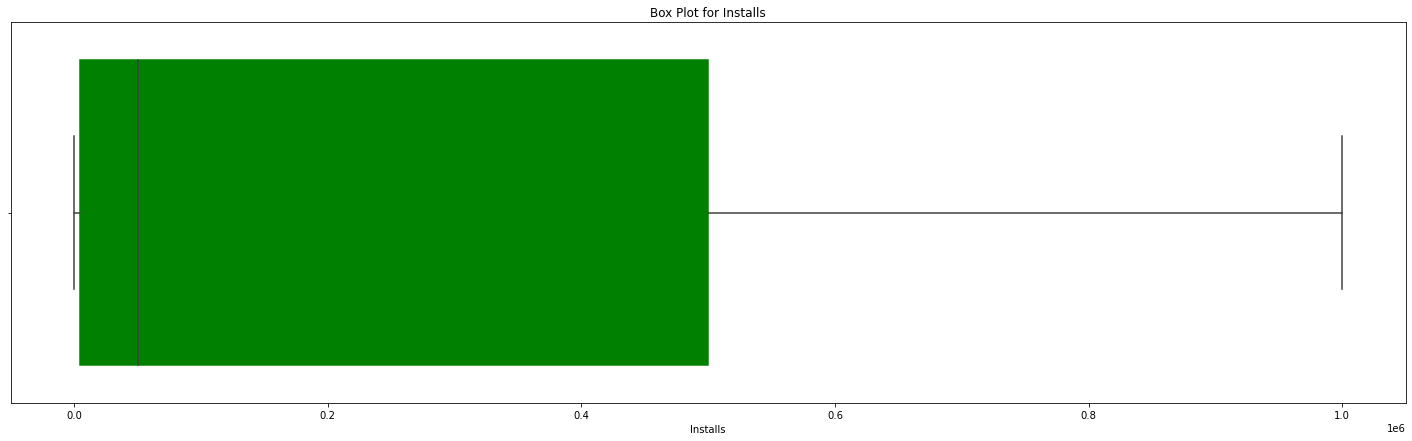

In [46]:
plt.figure(figsize = (25,7))
plt.title('Box Plot for Installs')
sns.boxplot(x = df.Installs, boxprops={'color' : 'green', })
plt.xlabel('Installs');

##### Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

###### Make scatter plot/joinplot for Rating vs. Price

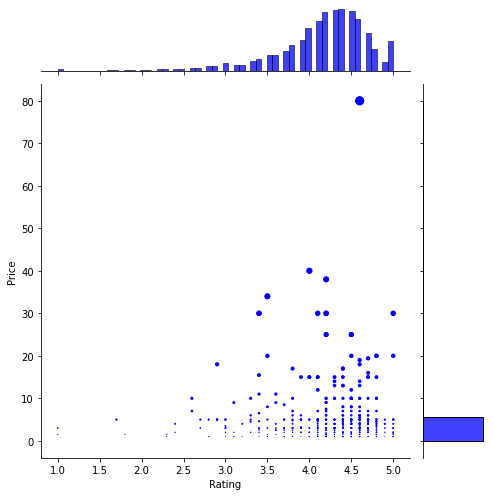

In [47]:
plt.figure(figsize = (20,7))
plt.title("Rating vs Price")
sns.jointplot(x=df['Rating'], y=df['Price'], color = "blue", s = df['Price'],height=7)
plt.close(1)
plt.xlabel("Rating")
plt.ylabel("Price");

###### What pattern do you observe? Does rating increase with price?

There is a positive linear relationship where the price is higher for the high rated apps.

##### Make scatter plot/joinplot for Rating vs. Size

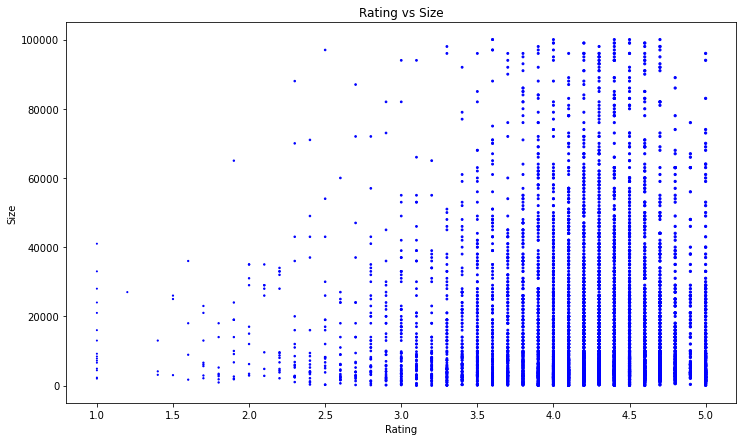

In [48]:
plt.figure(figsize = (12,7))
plt.title("Rating vs Size")
plt.scatter(df['Rating'], df['Size'], c = "Blue", s = df['Rating'])
plt.xlabel("Rating")
plt.ylabel("Size");

###### Are heavier apps rated better?

Heavier apps are rated better than the low sized apps.

###### Make scatter plot/joinplot for Rating vs. Reviews

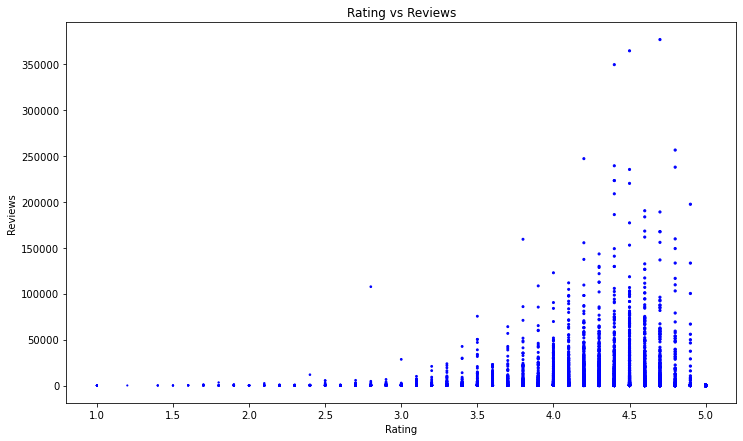

In [49]:
plt.figure(figsize = (12,7))
plt.title("Rating vs Reviews")
plt.scatter(df['Rating'], df['Reviews'], c = "Blue", s = df['Rating'])
plt.xlabel("Rating")
plt.ylabel("Reviews");

##### Does more review mean a better rating always?

There is a positive linear relationship between ratings and reviews, as from the scatter plot the reviews are high for the high rated apps.

##### Make boxplot for Rating vs. Content Rating

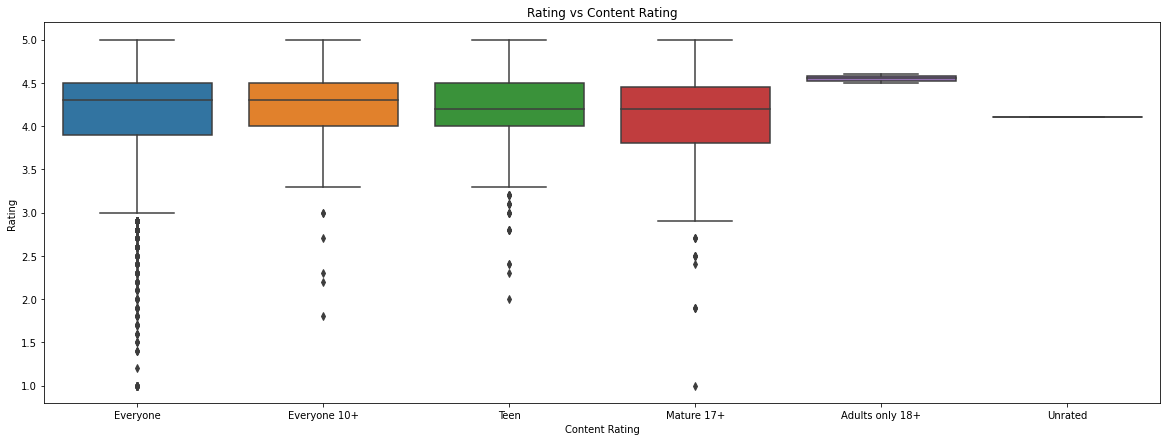

In [50]:
plt.figure(figsize = (20,7))
plt.title("Rating vs Content Rating")
sns.boxplot(x = 'Content Rating', y = 'Rating', data = df)
plt.xlabel("Content Rating")
plt.ylabel("Rating");

###### Is there any difference in the ratings? Are some types liked better?

Though there are outliers for almost all the apps, the content that is for everyone, everyone10+ and teen apps are rated high.

##### Make boxplot for Ratings vs. Category

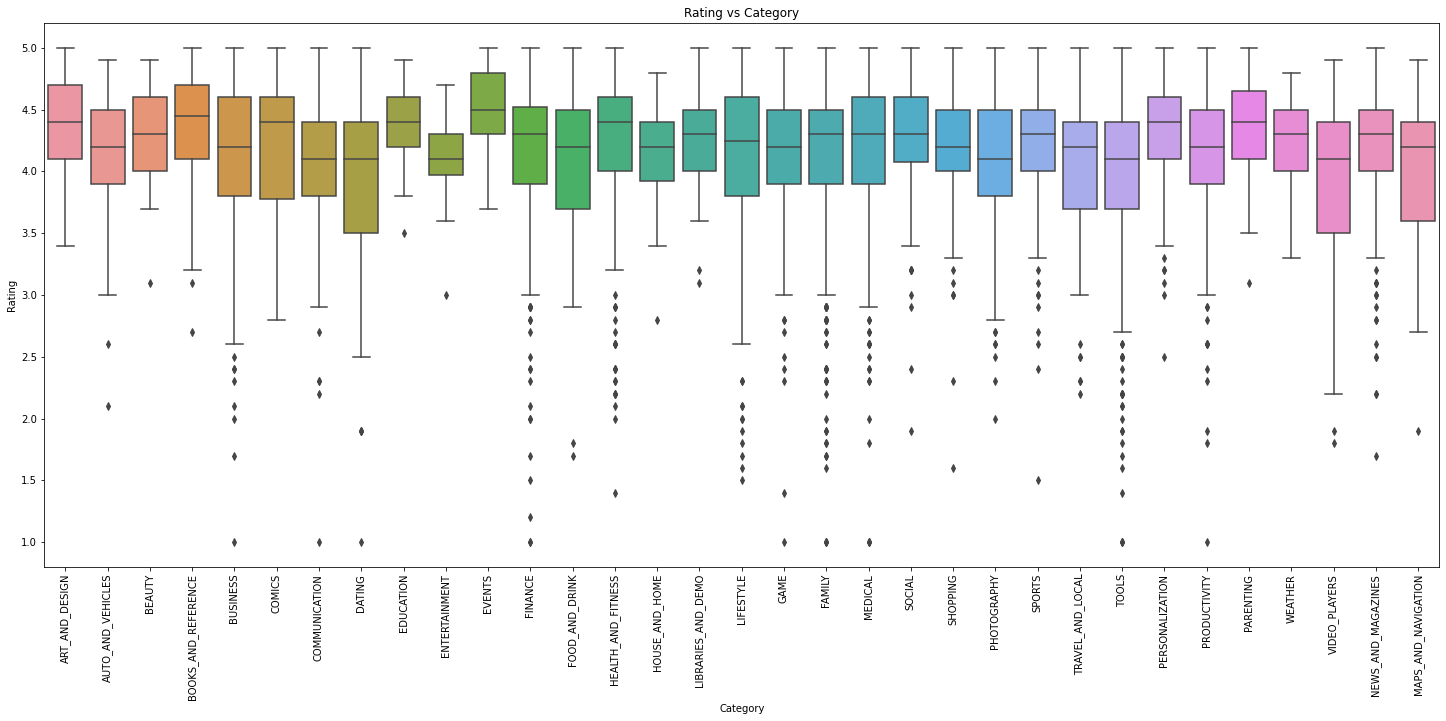

In [51]:
plt.figure(figsize = (25,10))
plt.title("Rating vs Category")
sns.boxplot(x = 'Category', y = 'Rating', data = df)
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.ylabel("Rating");

##### Which genre has the best ratings?

There are many genres or category of apps that have the highest ratings such as art and design, communication, books and references, games, family, shopping, news and magazine.

The frequency of the high rated and low sized apps are more in the histogram. The price and the size are high for the high rated apps.

##### Data preprocessing

##### For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

In [52]:
inp1 = df.copy()

In [53]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


##### Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [54]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])

In [55]:
inp1['Installs'] = np.log1p(inp1['Installs'])

###### Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [56]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,5.187386,19000.0,10.819798,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


In [57]:
inp1.drop(['Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [58]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,5.187386,19000.0,10.819798,Free,0.0,Everyone,Art & Design


###### Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [59]:
inp_cat= pd.get_dummies(inp1['Category'])

In [60]:
inp_genre= pd.get_dummies(inp1['Genres'])

In [61]:
inp_Con_Rat= pd.get_dummies(inp1['Content Rating'])

In [62]:
inp2 = pd.concat([inp1,inp_cat,inp_genre,inp_Con_Rat],axis=1)

In [63]:
inp2.drop(['Category','Genres','Content Rating'],axis=1,inplace=True)

In [64]:
inp2.head()

,App,Rating,Reviews,Size,Installs,Type,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,Trivia,Video Players & Editors,Weather,Word,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,5.075174,19000.0,9.210440,Free,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,6.875232,14000.0,13.122365,Free,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,6.875232,2800.0,11.512935,Free,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Paper flowers instructions,4.4,5.123964,5600.0,10.819798,Free,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,Smoke Effect Photo Maker - Smoke Editor,3.8,5.187386,19000.0,10.819798,Free,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


###### Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [65]:
df_train,df_test = train_test_split(inp2, test_size = 0.3, shuffle = True,random_state=169)

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4167 entries, 6402 to 6685
Columns: 152 entries, App to Unrated
dtypes: float64(5), object(2), uint8(145)
memory usage: 850.5+ KB


###### Separate the dataframes into X_train, y_train, X_test, and y_test.

In [67]:
x_train = df_train.drop(columns = ['App','Rating','Type'])

In [68]:
x_train

,Reviews,Size,Installs,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,...,Trivia,Video Players & Editors,Weather,Word,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
6402,6.030685,52000.0,9.210440,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8494,1.791759,1500.0,2.397895,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
490,10.796428,40000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5901,2.639057,3400.0,6.908755,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5655,3.367296,8800.0,6.908755,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,4.844187,1400.0,8.517393,2.49,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5980,1.791759,5500.0,6.216606,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7844,5.356586,3600.0,10.819798,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3666,8.930362,5600.0,13.815512,0.00,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [69]:
y_train = df_train['Rating']

In [70]:
x_test = df_test.drop(columns = ['App','Rating','Type'])

In [71]:
y_test = df_test['Rating']

In [72]:
y_test

5551     4.0
10689    4.4
6739     3.7
10819    3.3
7910     4.0
        ... 
6580     4.5
7131     5.0
4468     4.6
4410     4.7
10609    5.0
Name: Rating, Length: 1787, dtype: float64

## Model building

In [73]:
lm = LinearRegression()

###### Use linear regression as the technique

In [74]:
model = lm.fit(x_train, y_train)

In [75]:
model.coef_

array([ 1.62046368e-01, -1.03086654e-06, -1.44557934e-01, -4.39481211e-03,
       -1.27857488e-01,  3.03315537e-02,  1.13266866e-01,  1.05222089e-01,
       -1.61014164e-02, -8.75816453e-02, -9.34874086e-02, -1.50365627e-01,
        1.10587473e-01, -2.96747568e-02,  1.79250795e-01,  4.87292925e-02,
       -2.17701513e-02, -9.31202239e-03,  2.43244424e-01, -1.47418936e-02,
        8.36898093e-03,  6.66847710e-02, -2.48374070e-02, -9.14085398e-02,
        1.62560384e-02, -2.34114408e-02,  1.76376377e-01,  6.09096350e-02,
       -4.86918048e-02, -4.93078226e-02,  4.21351202e-03, -1.26324519e-02,
       -1.51555096e-01, -7.58410912e-02, -2.54948798e-02, -1.07738883e-01,
       -1.62998094e-03, -3.03750338e-01,  1.68570264e-01, -3.42342221e-01,
       -2.91981627e-01,  1.58043995e-01, -2.99890093e-01, -8.76151520e-04,
        2.69196560e-01,  4.21627467e-01,  3.81566955e-01,  9.53620821e-02,
        3.03315537e-02,  1.13266866e-01, -3.15047014e-01,  9.74574588e-12,
        1.12319941e-01,  

In [76]:
model.intercept_

4.727652222261446

###### Report the R2 on the train set

#### Make predictions on test set and report R2.

In [77]:
yhat = np.ravel(model.predict(x_test))

In [78]:
y_test = pd.DataFrame(y_test)

In [79]:
predictedprice = pd.DataFrame({"Actual Rating" : y_test['Rating'], 
                               "Predicted Rating" : yhat, "Error" : y_test['Rating'] - yhat})

In [80]:
predictedprice

,Actual Rating,Predicted Rating,Error
5551,4.0,4.040366,-0.040366
10689,4.4,4.099158,0.300842
6739,3.7,4.169631,-0.469631
10819,3.3,4.303345,-1.003345
7910,4.0,4.137437,-0.137437
...,...,...,...
6580,4.5,4.467992,0.032008
7131,5.0,4.220166,0.779834
4468,4.6,4.374920,0.225080
4410,4.7,4.370101,0.329899


In [81]:
score = r2_score(y_test['Rating'], yhat)
print((score*100))

16.42230335776702


In [82]:
mse = mean_squared_error(y_test['Rating'], yhat)
print("Mean Squared Error is", mse)

Mean Squared Error is 0.2731486499990485
